In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point, Polygon, MultiPolygon
import shapefile as shp
import plotly.express as px

In [142]:

zipcodes_csv = pd.read_csv('output-data/schools_rating_v2.csv')
cleaned_zipcode_df = zipcodes_csv[['name','zip','type','level-codes','lat','lon','lat_lon','new rating']].copy()
cleaned_zipcode_df['zip'] = cleaned_zipcode_df['zip'].fillna(0).astype(int)
cleaned_zipcode_df.head(-6)

,name,zip,type,level-codes,lat,lon,lat_lon,new rating
0,Graduation Achievement Center Charter High School,30303,charter,h,33.760502,-84.387169,"(33.760502, -84.387169)",NaN
1,Wellspring Living,30303,public,"m,h",33.754742,-84.385574,"(33.754742, -84.385574)",NaN
2,The Life School of Atlanta,30303,private,h,33.749504,-84.392090,"(33.749504, -84.39209)",NaN
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",B-
4,The Keystone School,30334,private,"m,h",33.749733,-84.385696,"(33.749733, -84.385696)",NaN
...,...,...,...,...,...,...,...,...
88,Woodward Academy,30337,private,"p,e,m,h",33.662815,-84.441978,"(33.662815, -84.441978)",A+
89,Bridge Academy,30337,private,h,33.654034,-84.449631,"(33.654034, -84.449631)",NaN
90,Greenforest Mccalep Christian Academy,30034,private,"p,e,m,h",33.714642,-84.257759,"(33.714642, -84.257759)",B
91,Southwest Dekalb High School,30034,public,h,33.701580,-84.225906,"(33.70158, -84.225906)",C


In [143]:
#cleaned_zipcode_df['zip'].describe()
cleaned_zipcode_df[~(cleaned_zipcode_df == 0).all(axis=1)]
cleaned_zipcode_df = cleaned_zipcode_df.loc[~((cleaned_zipcode_df['zip'] == 0))]
cleaned_zipcode_df = cleaned_zipcode_df.dropna(subset=['new rating'])

#cleaned_zipcode_df = cleaned_zipcode_df.loc[~((cleaned_zipcode_df['new rating'] == None))]

cleaned_zipcode_df.head()


,name,zip,type,level-codes,lat,lon,lat_lon,new rating
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",B-
5,The New School,30312,private,h,33.746407,-84.366058,"(33.746407, -84.366058)",C+
6,The New School Atlanta,30312,private,h,33.746407,-84.366058,"(33.746407, -84.366058)",A+
7,Cristo Rey Atlanta Jesuit High School,30308,private,h,33.760597,-84.382477,"(33.760597, -84.382477)",B-
8,KIPP Atlanta Collegiate,30314,charter,h,33.756157,-84.451271,"(33.756157, -84.451271)",C+


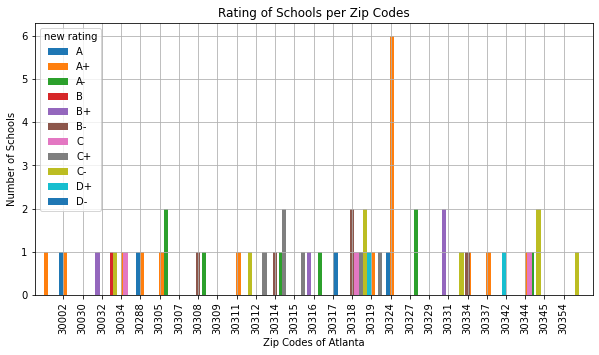

In [145]:
v_count = cleaned_zipcode_df.groupby(['zip'])['new rating'].value_counts()
count = cleaned_zipcode_df.groupby(['zip'])['new rating'].count()

labels= ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']
        
df_plot = (cleaned_zipcode_df.groupby(['zip'])['new rating'].value_counts()).unstack(1).plot(figsize=(10,5), grid=True,kind='bar',width = 2.5, legend=True)
plt.title("Rating of Schools per Zip Codes")
plt.xlabel('Zip Codes of Atlanta') 
plt.ylabel('Number of Schools')
plt.savefig('output-data/ratings_zip_schools.png')
#  .droplevel(0,axis=1)
#  .sort_index(1,ascending=False)
#  .plot(figsize=(8,5), grid=True,kind='bar',legend=False))


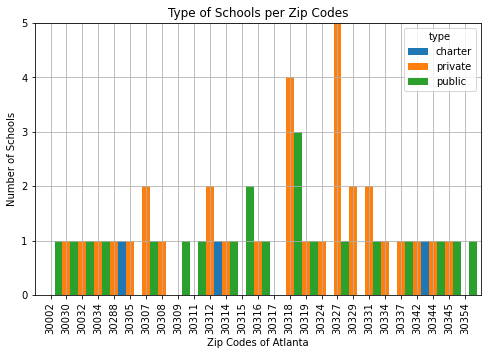

In [146]:
df_plot = (cleaned_zipcode_df.groupby(['zip'])['type'].value_counts()).unstack(1).plot(figsize=(8,5), grid=True,kind='bar',width = 1.5, legend=True)
plt.title("Type of Schools per Zip Codes")
plt.xlabel('Zip Codes of Atlanta') 
plt.ylabel('Number of Schools')
plt.ylim(0,5)
plt.savefig('output-data/type_zip_schools.png')


# calculate sum of values by group
df_zips = cleaned_zipcode_df.groupby(['zip'])['name'].count()
plt.figure(figsize=(12,8))

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.ylim([0, 9])

# displaying the title
plt.title("Number of Public and Private High Schools per Zipcode")
plt.savefig('output-data/num_schools.png')

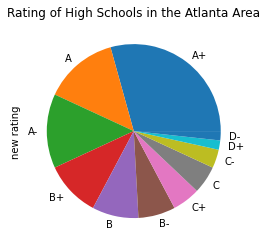

In [147]:
labels= ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D-','n/a']

cleaned_zipcode_df.sort_values('new rating', ascending=False)
cleaned_zipcode_df['new rating'].value_counts().plot(kind='pie',labels=labels)
plt.title("Rating of High Schools in the Atlanta Area")
plt.savefig("output-data/Ratings_of_schools.png")

plt.show()

In [148]:
df = cleaned_zipcode_df.dropna()
df.describe()

,zip,lat,lon
count,58.000000,58.000000,58.000000
mean,30286.896552,33.771614,-84.383244
std,97.711119,0.065749,0.073278
min,30002.000000,33.656731,-84.516296
25%,30309.500000,33.722300,-84.435812
50%,30318.000000,33.761715,-84.387085
75%,30328.500000,33.827171,-84.327911
max,30354.000000,33.908474,-84.225906


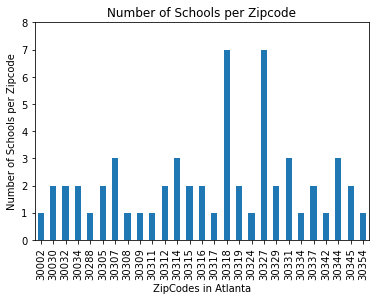

In [151]:


#calculate sum of values by group
df_zips = df.groupby(['zip'])['name'].count()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.ylim([0, 8])

# displaying the title
plt.title("Number of Schools per Zipcode")
plt.savefig('output-data/num_schools.png')

In [152]:
rating_range = cleaned_zipcode_df.copy()
#data_time_range["zipcode"]=z["zipcode"].unique()

rating_range.head()

,name,zip,type,level-codes,lat,lon,lat_lon,new rating
3,K12 International Academy,30334,private,"e,m,h",33.749733,-84.385696,"(33.749733, -84.385696)",B-
5,The New School,30312,private,h,33.746407,-84.366058,"(33.746407, -84.366058)",C+
6,The New School Atlanta,30312,private,h,33.746407,-84.366058,"(33.746407, -84.366058)",A+
7,Cristo Rey Atlanta Jesuit High School,30308,private,h,33.760597,-84.382477,"(33.760597, -84.382477)",B-
8,KIPP Atlanta Collegiate,30314,charter,h,33.756157,-84.451271,"(33.756157, -84.451271)",C+


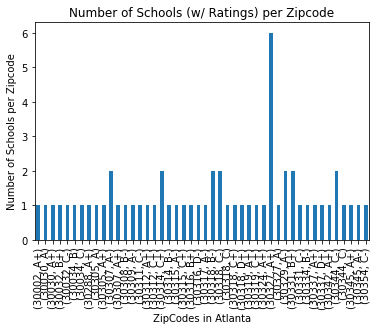

In [153]:
#calculate sum of values by group
df_zips = df.groupby(['zip'])['new rating'].value_counts()

#create bar plot by group
df_zips.plot(kind='bar')
plt.xlabel('ZipCodes in Atlanta') 
plt.ylabel('Number of Schools per Zipcode') 
plt.xlim  
# displaying the title
plt.title("Number of Schools (w/ Ratings) per Zipcode")
plt.savefig('output-data/ratings.png')

In [39]:
#!pip install folium

In [165]:
import folium
map = folium.Map(location=[33.675117, -84.451271], default_zoom_start=15)

for i in range(0,len(rating_range)):
   folium.Circle(
      location=[rating_range.iloc[i]['lat'], rating_range.iloc[i]['lon']],
      popup=[rating_range.iloc[i]['name'],rating_range.iloc[i]['new rating']],
      radius=30, #float(data.iloc[i]['value'])*20000,
      color='crimson',
      fill=True,
      fill_color='black'
   ).add_to(map)
map

In [159]:
def main(map):
    map_html = map._repr_html_()
    return {"map": map_html}

In [160]:
{{ outputs.map }}

NameError: name 'outputs' is not defined